# K-means implementation differences demo

In [10]:
from sklearn.datasets import make_blobs
import sklearn.cluster
import numpy as np
import matplotlib.pyplot as plt

Generate and plot some random blobs of data.

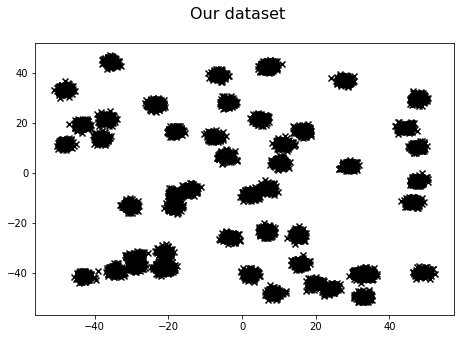

In [9]:
#Generate data
nclust = 50
np.set_seed = 2
cmeans = np.random.rand(nclust,2)*100 - 50 # Initial starting guesses for the centres
num_samples = 10000
(points,ground_truth) = make_blobs(n_samples=num_samples, n_features=2, centers=nclust, cluster_std=1.0, center_box=(-50.0, 50.0), shuffle=True, random_state=0)


f = plt.figure(figsize=(7.5,5))
f.suptitle('Our dataset', fontsize=16)
ax = f.add_subplot(111)
ax.scatter(points[:,0],points[:,1],marker='x', c = 'black');

What follows is a demonstration that different implementations of the same algorithm can lead to different results.

Saying **'This is the result of applying [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) using the [Kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B) initialisation scheme'** is not sufficient to allow someone to reproduce your work.

Even an algorithm as simple as K-means can exhibit different behaviours across implementations.  To enable reproducibility, we need to share the exact code and data used in our analysis.

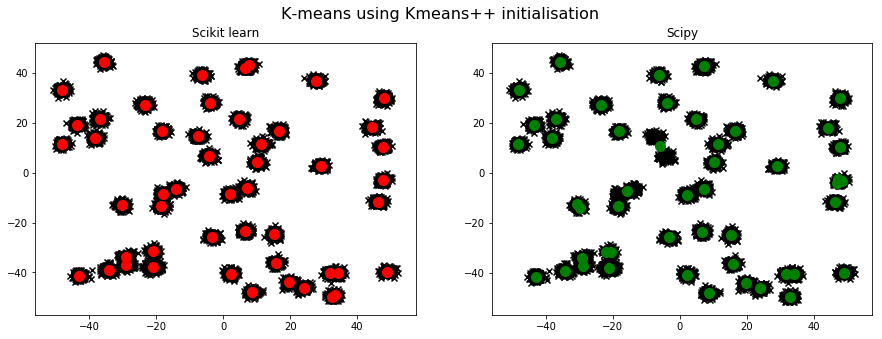

In [2]:
#K-means Clustering with initialisation using kmeans++
#Compute cluster centres using scipy
import scipy.cluster
scipy_res = scipy.cluster.vq.kmeans2(points, k=50, minit='++')
#Compute cluster centres using scikit-learn
from sklearn.cluster import KMeans as scikit_kmeans
kmeans_scikit_result = scikit_kmeans(n_clusters=50,init='k-means++').fit(points)

f = plt.figure(figsize=(15,5))
f.suptitle('K-means using Kmeans++ initialisation', fontsize=16)
ax = f.add_subplot(122)
ax2 = f.add_subplot(121)
ax.scatter(points[:,0],points[:,1],marker='x', c = 'black')
ax.scatter(scipy_res[0][:,0],scipy_res[0][:,1], color='green',s=100);
ax.set_title('Scipy')
ax2.scatter(points[:,0],points[:,1],marker='x', c = 'black')
ax2.scatter(kmeans_scikit_result.cluster_centers_[:,0],kmeans_scikit_result.cluster_centers_[:,1], color='red',s=100);
ax2.set_title('Scikit learn');